<a href="https://colab.research.google.com/github/sanzoey/aiml-projects/blob/master/Collaborative_Filtering_Book_Rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Loading data
books_df = pd.read_csv("/content/drive/My Drive/Datasets/External Lab 5/books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books_df.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


users_df = pd.read_csv('/content/drive/My Drive/Datasets/External Lab 5/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users_df.columns = ['userID', 'Location', 'Age']

ratings_df = pd.read_csv('/content/drive/My Drive/Datasets/External Lab 5/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings_df.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:27

### Check no.of records and features given in each dataset
hint - check shape

In [4]:
books_df.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
users_df.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings_df.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Exploring books dataset

In [7]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271360 non-null  object
 1   bookTitle          271360 non-null  object
 2   bookAuthor         271359 non-null  object
 3   yearOfPublication  271360 non-null  object
 4   publisher          271358 non-null  object
 5   imageUrlS          271360 non-null  object
 6   imageUrlM          271360 non-null  object
 7   imageUrlL          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
books_df.shape

(271360, 8)

### Drop last three columns containing image URLs which will not be required for analysis

In [9]:
books_df.drop(columns=['imageUrlS', 'imageUrlM', 'imageUrlL'], inplace=True)

In [10]:
books_df.columns

Index(['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher'], dtype='object')

**yearOfPublication**

### Check unique values of yearOfPublication


In [11]:
books_df.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [12]:
books_df.yearOfPublication.unique().shape[0]

202

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [13]:
books_df[books_df.yearOfPublication == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [14]:
books_df[books_df.yearOfPublication == 'Gallimard']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [15]:
books_df.drop(books_df[(books_df.yearOfPublication == 'DK Publishing Inc') | (books_df.yearOfPublication == 'Gallimard')].index, inplace=True)

In [16]:
books_df[(books_df.yearOfPublication == 'DK Publishing Inc') | (books_df.yearOfPublication == 'Gallimard')]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher


In [17]:
books_df.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [18]:
books_df.shape

(271357, 5)

### Change the datatype of yearOfPublication to 'int'

In [19]:
books_df.yearOfPublication = books_df.yearOfPublication.astype(int)

In [20]:
books_df.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [21]:
books_df.publisher.isna().sum()

2

In [22]:
books_df.dropna(subset=['publisher'], inplace=True)

In [23]:
books_df.publisher.isna().sum()

0

## Exploring Users dataset

In [24]:
users_df.head()

,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

We cannot sort age column in ascending order. First of all it is in string datatype, second it is having null values. After treating this we'll sort in ascending order.

In [25]:
users_df.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [26]:
def ProcessAge(value):
  if value > 90 or value < 5:
    return np.nan
  else:
    return value

users_df['Age'] = users_df['Age'].apply(lambda x: ProcessAge(x))

In [27]:
users_df.Age.unique()

array([nan, 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 35., 13., 58., 49., 38., 45., 62.,
       63., 27., 33., 29., 66., 40., 15., 60., 79., 22., 16., 65., 59.,
       48., 72., 56., 67., 80., 52., 69., 71., 73., 78.,  9., 64., 12.,
       74., 75., 76., 83., 68., 11., 77., 70.,  8.,  7., 81., 10.,  5.,
        6., 84., 82., 90., 85., 86., 87., 89., 88.])

### Replace null values in column `Age` with mean

In [28]:
mean = users_df.Age.mean()

users_df.Age.fillna(mean, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


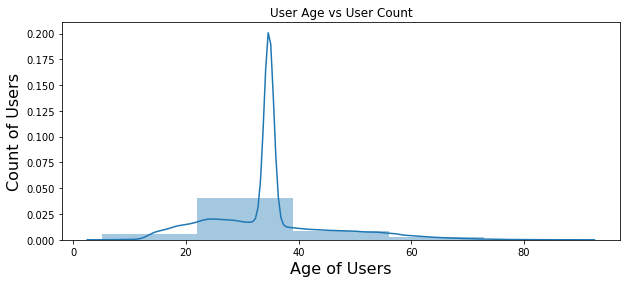

In [29]:
plt.rcParams['figure.figsize'] = (10, 4)
ax = sns.distplot(users_df.Age, bins = 5)
ax.set_xlabel(xlabel = 'Age of Users', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Users', fontsize = 16)
ax.set_title(label = 'User Age vs User Count')
plt.show()

### Change the datatype of `Age` to `int`

In [30]:
users_df.Age = users_df.Age.astype(int)

In [31]:
users_df.dtypes

userID       int64
Location    object
Age          int64
dtype: object

In [32]:
age_group = users_df.Age.unique()
print(sorted(age_group))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [33]:
ratings_df.head()

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [34]:
ratings_df.shape

(1149780, 3)

### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [35]:
books_array = books_df.ISBN.unique()

ratings_df = ratings_df.loc[ratings_df.ISBN.isin(books_array)]

In [36]:
ratings_df.shape

(1031130, 3)

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [37]:
users_array = users_df.userID.unique()

ratings_df = ratings_df.loc[ratings_df.userID.isin(users_array)]

In [38]:
ratings_df.shape

(1031130, 3)

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [39]:
ratings_nozeros_df = ratings_df.loc[ratings_df.bookRating != 0]

In [40]:
ratings_nozeros_df.shape

(383839, 3)

### Find out which rating has been given highest number of times

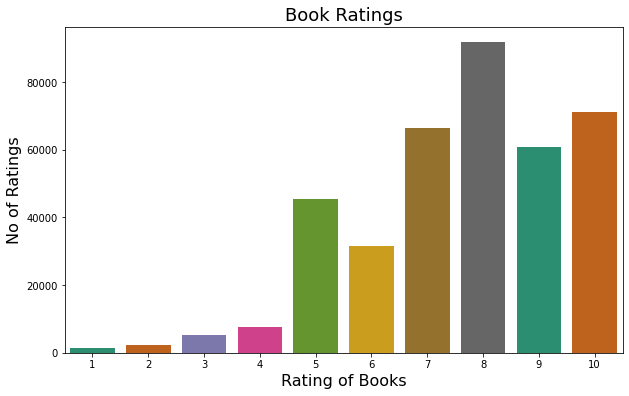

In [41]:
plt.rcParams['figure.figsize'] = (10, 6)
ax = sns.countplot(x = 'bookRating', data = ratings_nozeros_df, palette = 'Dark2')
ax.set_xlabel(xlabel = 'Rating of Books', fontsize = 16)
ax.set_ylabel(ylabel = 'No of Ratings', fontsize = 16)
ax.set_title('Book Ratings', fontsize = 18)
plt.show()

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [42]:
ratings_rated100 = ratings_nozeros_df.userID.value_counts() >= 100
ratings_rated100 = ratings_rated100[ratings_rated100]
ratings_rated100_df = ratings_nozeros_df.loc[ratings_nozeros_df.userID.isin(ratings_rated100.index)]
ratings_rated100_df.shape

(103269, 3)

### Transform data to surprise format

In [43]:
!pip install surprise
from surprise import Dataset,Reader
from surprise.model_selection import cross_validate
from surprise import NormalPredictor


reader = Reader(rating_scale=(1, 10))

     |████████████████████████████████| 11.8MB 2.9MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp36-cp36m-linux_x86_64.whl size=1670917 sha256=a16dbd1ee044f7c8e57225b8d28024f691f069dcc9db9d4e03dd906be5589669
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [44]:
surprise_rating_df = Dataset.load_from_df(ratings_rated100_df, reader)

### Points to Note:
1) Trainset is no longer a pandas dataframe. Rather, it's a specific datatypes defined by the Surprise library


2) UserID and ISBN in the pandas dataframe can contain any value (either string/integer etc). However, Trainset convert these raw ids into numeric indexes called as "inner id"


3) Methods are provided to convert rw id to inner id and vice verca

### SVD Based Recommendation System

### Split the above data into trainset and testset

In [45]:
from surprise.model_selection import train_test_split
train_set, test_set = train_test_split(surprise_rating_df, test_size = 0.25, random_state = 41)

### Explore trainset and testset

In [48]:
type(train_set)

surprise.trainset.Trainset

In [53]:
print('User Dict')
print(train_set.ur)
print('Item Dict')
print(train_set.ir)
print('User 1 Ratings')
print(train_set.ur[0])

User Dict
defaultdict(<class 'list'>, {0: [(0, 8.0), (860, 6.0), (1116, 6.0), (1639, 8.0), (2282, 8.0), (2788, 7.0), (2899, 10.0), (2915, 5.0), (3360, 5.0), (3540, 10.0), (4037, 8.0), (4748, 5.0), (5477, 9.0), (5674, 9.0), (5848, 10.0), (8450, 8.0), (8674, 8.0), (8732, 7.0), (9709, 10.0), (10655, 7.0), (11601, 7.0), (12483, 10.0), (13402, 6.0), (13581, 7.0), (15174, 4.0), (15731, 7.0), (16117, 5.0), (16297, 5.0), (17168, 10.0), (17217, 7.0), (18342, 7.0), (19269, 7.0), (19447, 7.0), (19580, 6.0), (19689, 10.0), (9002, 10.0), (20652, 5.0), (22168, 8.0), (22372, 7.0), (23158, 7.0), (23491, 6.0), (23743, 8.0), (25424, 7.0), (25614, 10.0), (25802, 9.0), (26024, 7.0), (27078, 6.0), (27966, 6.0), (28096, 7.0), (28592, 10.0), (29747, 3.0), (29926, 6.0), (30206, 6.0), (30288, 8.0), (30570, 6.0), (5819, 10.0), (31058, 8.0), (31914, 2.0), (24545, 10.0), (32605, 10.0), (35651, 5.0), (36356, 10.0), (642, 8.0), (38077, 7.0), (38308, 7.0), (13443, 6.0), (1805, 8.0), (39476, 7.0), (40149, 5.0), (4098

### Import SVD from Surprise and for on trainset

In [54]:
from surprise import SVD
from surprise import accuracy

In [55]:
model = SVD()
model.fit(train_set)

### Predict ratings for testset and check RMSE

In [56]:
predictions = model.test(test_set)

In [57]:
accuracy.rmse(predictions)

RMSE: 1.5120


1.5120331591715315

### Generating top n recommendations for a user

In [60]:
predictions[0]

Prediction(uid=102702, iid='0312984839', r_ui=10.0, est=9.872537187645838, details={'was_impossible': False})

In [66]:
predictions_df = pd.DataFrame(predictions)
predictions_df['was_impossible'] = predictions_df['details'].apply(lambda x: x['was_impossible'])
predictions_df.head(5)

,uid,iid,r_ui,est,details,was_impossible
0,102702,0312984839,10.0,9.872537,{'was_impossible': False},False
1,102967,044021145X,6.0,6.232436,{'was_impossible': False},False
2,225763,0316693200,8.0,5.554692,{'was_impossible': False},False
3,130554,0590462229,7.0,5.994916,{'was_impossible': False},False
4,236283,0805059555,10.0,9.183138,{'was_impossible': False},False


In [67]:
anti_test_set = train_set.build_anti_testset()
anti_test_set[0: 5]

[(49889, '0399149368', 7.825541309989542),
 (49889, '055306729X', 7.825541309989542),
 (49889, '0452270073', 7.825541309989542),
 (49889, '0886778328', 7.825541309989542),
 (49889, '0793818664', 7.825541309989542)]

In [73]:
predictions = model.test(anti_test_set[0: 1000])
predictions

[Prediction(uid=49889, iid='0399149368', r_ui=7.825541309989542, est=7.548355088361021, details={'was_impossible': False}),
 Prediction(uid=49889, iid='055306729X', r_ui=7.825541309989542, est=7.265520708649518, details={'was_impossible': False}),
 Prediction(uid=49889, iid='0452270073', r_ui=7.825541309989542, est=7.377145083093364, details={'was_impossible': False}),
 Prediction(uid=49889, iid='0886778328', r_ui=7.825541309989542, est=7.852794500543473, details={'was_impossible': False}),
 Prediction(uid=49889, iid='0793818664', r_ui=7.825541309989542, est=7.108138848984096, details={'was_impossible': False}),
 Prediction(uid=49889, iid='0553142003', r_ui=7.825541309989542, est=7.405800309414034, details={'was_impossible': False}),
 Prediction(uid=49889, iid='0553298534', r_ui=7.825541309989542, est=7.21256410618447, details={'was_impossible': False}),
 Prediction(uid=49889, iid='0380820560', r_ui=7.825541309989542, est=7.605474966010058, details={'was_impossible': False}),
 Predicti

In [75]:
predictions_new_df = pd.DataFrame([[x.uid, x.iid, x.est] for x in predictions])
predictions_new_df.head()

,0,1,2
0,49889,0399149368,7.548355
1,49889,055306729X,7.265521
2,49889,0452270073,7.377145
3,49889,0886778328,7.852795
4,49889,0793818664,7.108139


In [76]:
predictions_new_df.columns = ['userID', 'ISBN', 'predicted_rating']
predictions_new_df.sort_values(by = ['userID', 'predicted_rating'], ascending = False, inplace = True)

In [77]:
predictions_new_df.head()

,userID,ISBN,predicted_rating
790,49889,034536676X,8.372671
946,49889,0740704818,8.353280
266,49889,038079487X,8.277172
983,49889,0618002227,8.274479
674,49889,0449005615,8.254708
